## SegFormer 

In [1]:
import torch
import mmcv
import os
import time
import matplotlib.pyplot as plt
from mmengine.model.utils import revert_sync_batchnorm
from mmseg.apis import init_model, inference_model, show_result_pyplot

In [2]:
# Load configs and checkpoint!
config_file = '../configs/segformer/segformer_mit-b0_8xb1-taco_stuff-512x512.py'
checkpoint_file = '../work_dirs/segformer_mit-b0_8xb1-taco_stuff-512x512/iter_160000.pth'

# Load images
train_img_path = "/home/zozan-server/Work/FER/mmsegmentation/data/TACO/images/train"
test_img_path = "/home/zozan-server/Work/FER/mmsegmentation/data/TACO/images/test"
test_images, train_images = [], []
# Train images
for i in os.listdir(train_img_path): 
    train_images.append(os.path.join(train_img_path, i))
# Test images
for i in os.listdir(test_img_path): 
    test_images.append(os.path.join(test_img_path, i))
    
def get_current_time_milliseconds():
    return int(time.time() * 1000)

In [5]:
# build the model from a config file and a checkpoint file
model = init_model(config_file, checkpoint_file, device='cuda:0')

# test a single image
img = 'demo.png'
if not torch.cuda.is_available():
    model = revert_sync_batchnorm(model)

/home/zozan-server/Work/FER/mmsegmentation/mmseg/models/builder.py:36: UserWarning: ``build_loss`` would be deprecated soon, please use ``mmseg.registry.MODELS.build()`` 
  warnings.warn('``build_loss`` would be deprecated soon, please use '
/home/zozan-server/Work/FER/mmsegmentation/mmseg/models/losses/cross_entropy_loss.py:235: UserWarning: Default ``avg_non_ignore`` is False, if you would like to ignore the certain label and average loss over non-ignore labels, which is the same with PyTorch official cross_entropy, set ``avg_non_ignore=True``.
  warnings.warn(


Loads checkpoint by local backend from path: ../work_dirs/segformer_mit-b0_8xb1-taco_stuff-512x512/iter_160000.pth


In [6]:
# Inference on list of mulitple images   
def infer_on_images(model, images_list, n_infer): 
    results = []
    for img in images_list[:n_infer]: 
        curr_milis = get_current_time_milliseconds() 
        result = inference_model(model, img)
        results.append(result)
        print("Inference duration is: {} ms".format(get_current_time_milliseconds() - curr_milis))
    return results

# Inference on just one image
def infer_on_image(model, img): 
    curr_t = get_current_time_milliseconds()
    result = inference_model(model, img)
    print("Inference duration is: {} ms".format(get_current_time_milliseconds() - curr_t))
    return result 


## Visualization on the trained images 

Inference duration is: 318 ms
Inference duration is: 101 ms
Inference duration is: 101 ms
Inference duration is: 207 ms
Inference duration is: 152 ms
Plot duration is: 13355
Plot duration is: 6037
Plot duration is: 4236


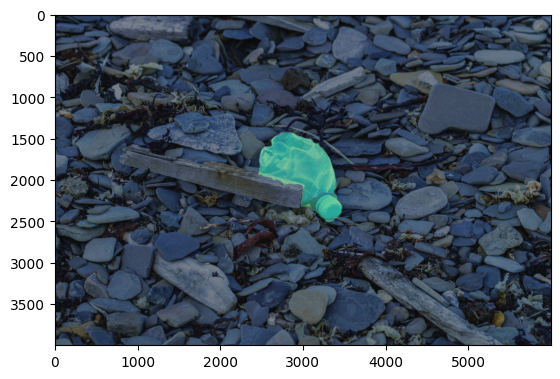

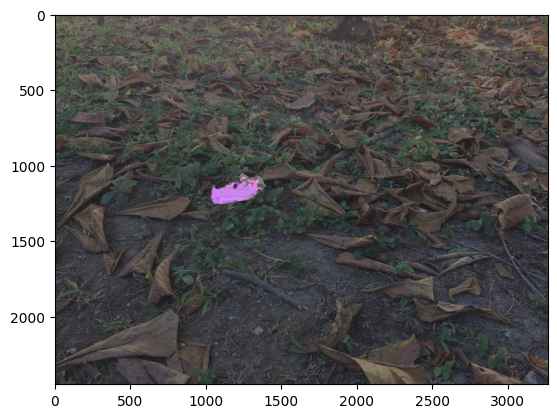

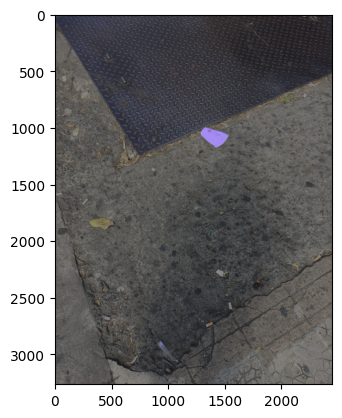

In [8]:
# show the results
results = []
results = infer_on_images(model, train_images, 5)

# Plotting duration is insane!
# Find how to plot faster based on the result (Create my own plotting function)
# Copy color palette
for i in range(3): 
    start_t = get_current_time_milliseconds()
    plt.figure(i)
    vis_result = show_result_pyplot(model, train_images[i], results[i])
    plt.imshow(mmcv.bgr2rgb(vis_result))
    duration = get_current_time_milliseconds() - start_t
    print("Plot duration is: {} ms".format(duration))

## Visualization on the unseen images

In [122]:
def visualize_on_images(images, results): 
    for i, (img, anot) in enumerate(zip(images, results)): 
        print("Showing {} img!".format(i))
        start_time = get_current_time_milliseconds()
        plt.figure(i)
        vis_result = show_result_pyplot(model, img, anot)
        plt.imshow(mmcv.bgr2rgb(vis_result))
        duration = get_current_time_milliseconds() - start_time
        print("Plotting {} img duraton is {} ms.".format(i,duration))

In [116]:
results = infer_on_images(model, test_images, 5)
results = infer_on_images(model, test_images, 5)
results = infer_on_images(model, test_images, 5)

test_results = []
for test_img in test_images: 
    infer_on_image(model, test_img)

Inference duration is: 129 ms
Inference duration is: 92 ms
Inference duration is: 102 ms
Inference duration is: 107 ms
Inference duration is: 82 ms
Inference duration is: 108 ms
Inference duration is: 240 ms
Inference duration is: 212 ms
Inference duration is: 106 ms
Inference duration is: 83 ms
Inference duration is: 114 ms
Inference duration is: 94 ms
Inference duration is: 103 ms
Inference duration is: 515 ms
Inference duration is: 96 ms
Inference duration is: 111 ms
Inference duration is: 97 ms
Inference duration is: 117 ms
Inference duration is: 130 ms
Inference duration is: 447 ms
Inference duration is: 104 ms
Inference duration is: 111 ms
Inference duration is: 113 ms
Inference duration is: 91 ms
Inference duration is: 227 ms
Inference duration is: 94 ms
Inference duration is: 92 ms
Inference duration is: 99 ms
Inference duration is: 85 ms
Inference duration is: 96 ms
Inference duration is: 128 ms
Inference duration is: 111 ms
Inference duration is: 117 ms
Inference duration is:

Showing 0 img!
Plotting 0 img duraton is 13397 ms.
Showing 1 img!
Plotting 1 img duraton is 6266 ms.
Showing 2 img!
Plotting 2 img duraton is 5351 ms.
Showing 3 img!
Plotting 3 img duraton is 5214 ms.
Showing 4 img!
Plotting 4 img duraton is 11158 ms.


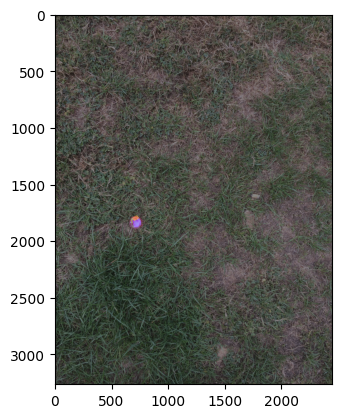

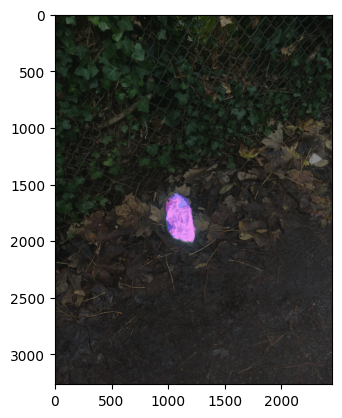

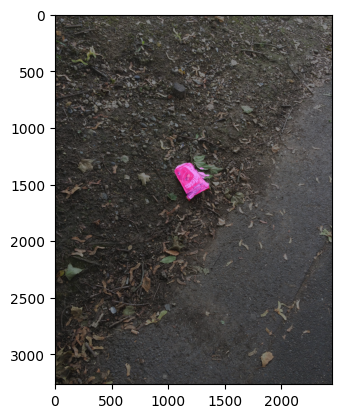

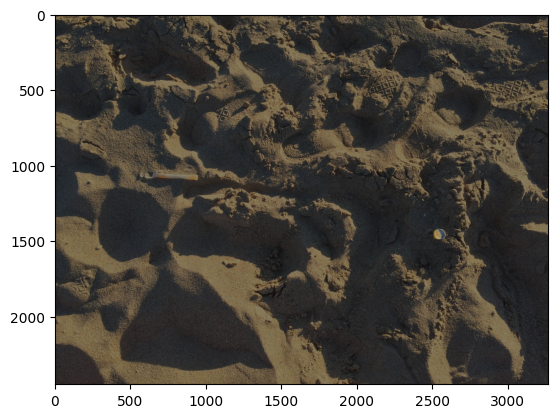

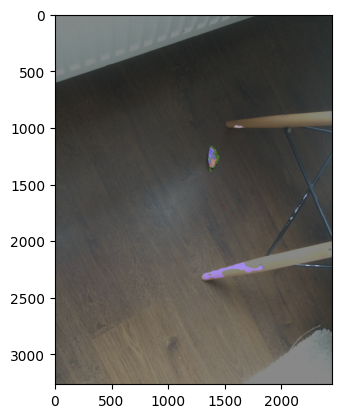

In [123]:
visualize_on_images(test_images, results)

## Comments: 

- Saving tensors in memory (results) list --> kills GPU memory, that's why inference doesn't work on one image 
- Get just one result and over --> use `infer_on_img` method 


## TODO: 

- [ ] Measure duration of the plotting method 
- [ ] Create my own plotting function (faster than current one) 

Inference duration is: 150 ms


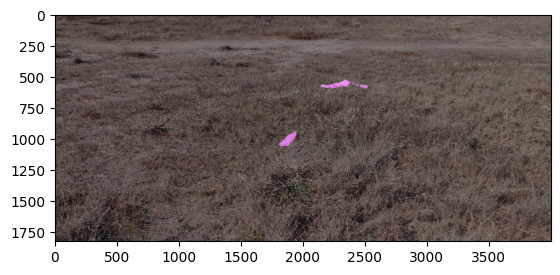

In [315]:
result = infer_on_image(model, test_images[-1])
vis_result = show_result_pyplot(model, test_images[-1], result)
plt.imshow(mmcv.bgr2rgb(vis_result))

Inference duration is: 131 ms
Creating color mask!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Full duration is: 555
Visualizing result


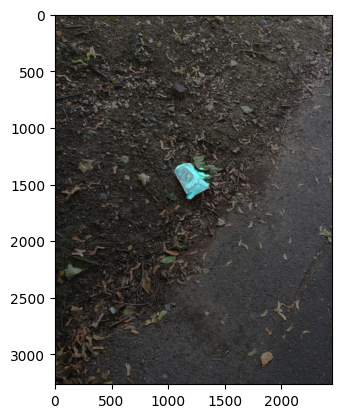

In [355]:
def infer_and_visualize(img_path, model, opacity): 
    result = infer_on_image(model, img_path)
    visualize_result(img_path, result, opacity)


infer_and_visualize(test_images[2], model, 0.5)

## Result consits of `SegDataSample` which has: 
- `ori_shape`
- `img_shape`
- `img_path`
- `seg_logits.data`
- `pred_sem_seg.data` 

In [124]:
def convert_tensor_to_array(result_tensor): 
    return result_tensor.pred_sem_seg.data.detach().cpu().numpy()

In [283]:
array = convert_tensor_to_array(result)

In [342]:
from  PIL import Image
im = Image.fromarray(c_mask)
display(im)

TypeError: Cannot handle this data type: (1, 1, 3), <f8

In [353]:
color_mapping = {
    0: (0, 0, 0),       # Background (Black)
    1: (255, 0, 0),     # Class 1 (Red)
    2: (0, 255, 0),     # Class 2 (Green)
    3: (0, 0, 255),     # Class 3 (Blue) 
    4: (255, 255, 0),   # Class 4 (Yellow) 
    5: (255, 0, 255),   # Class 5 (Magenta)
    6: (0, 255, 255),   # Class 6 (Cyan)
    7: (0, 100, 100)}

Creating color mask!


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Full duration is: 553


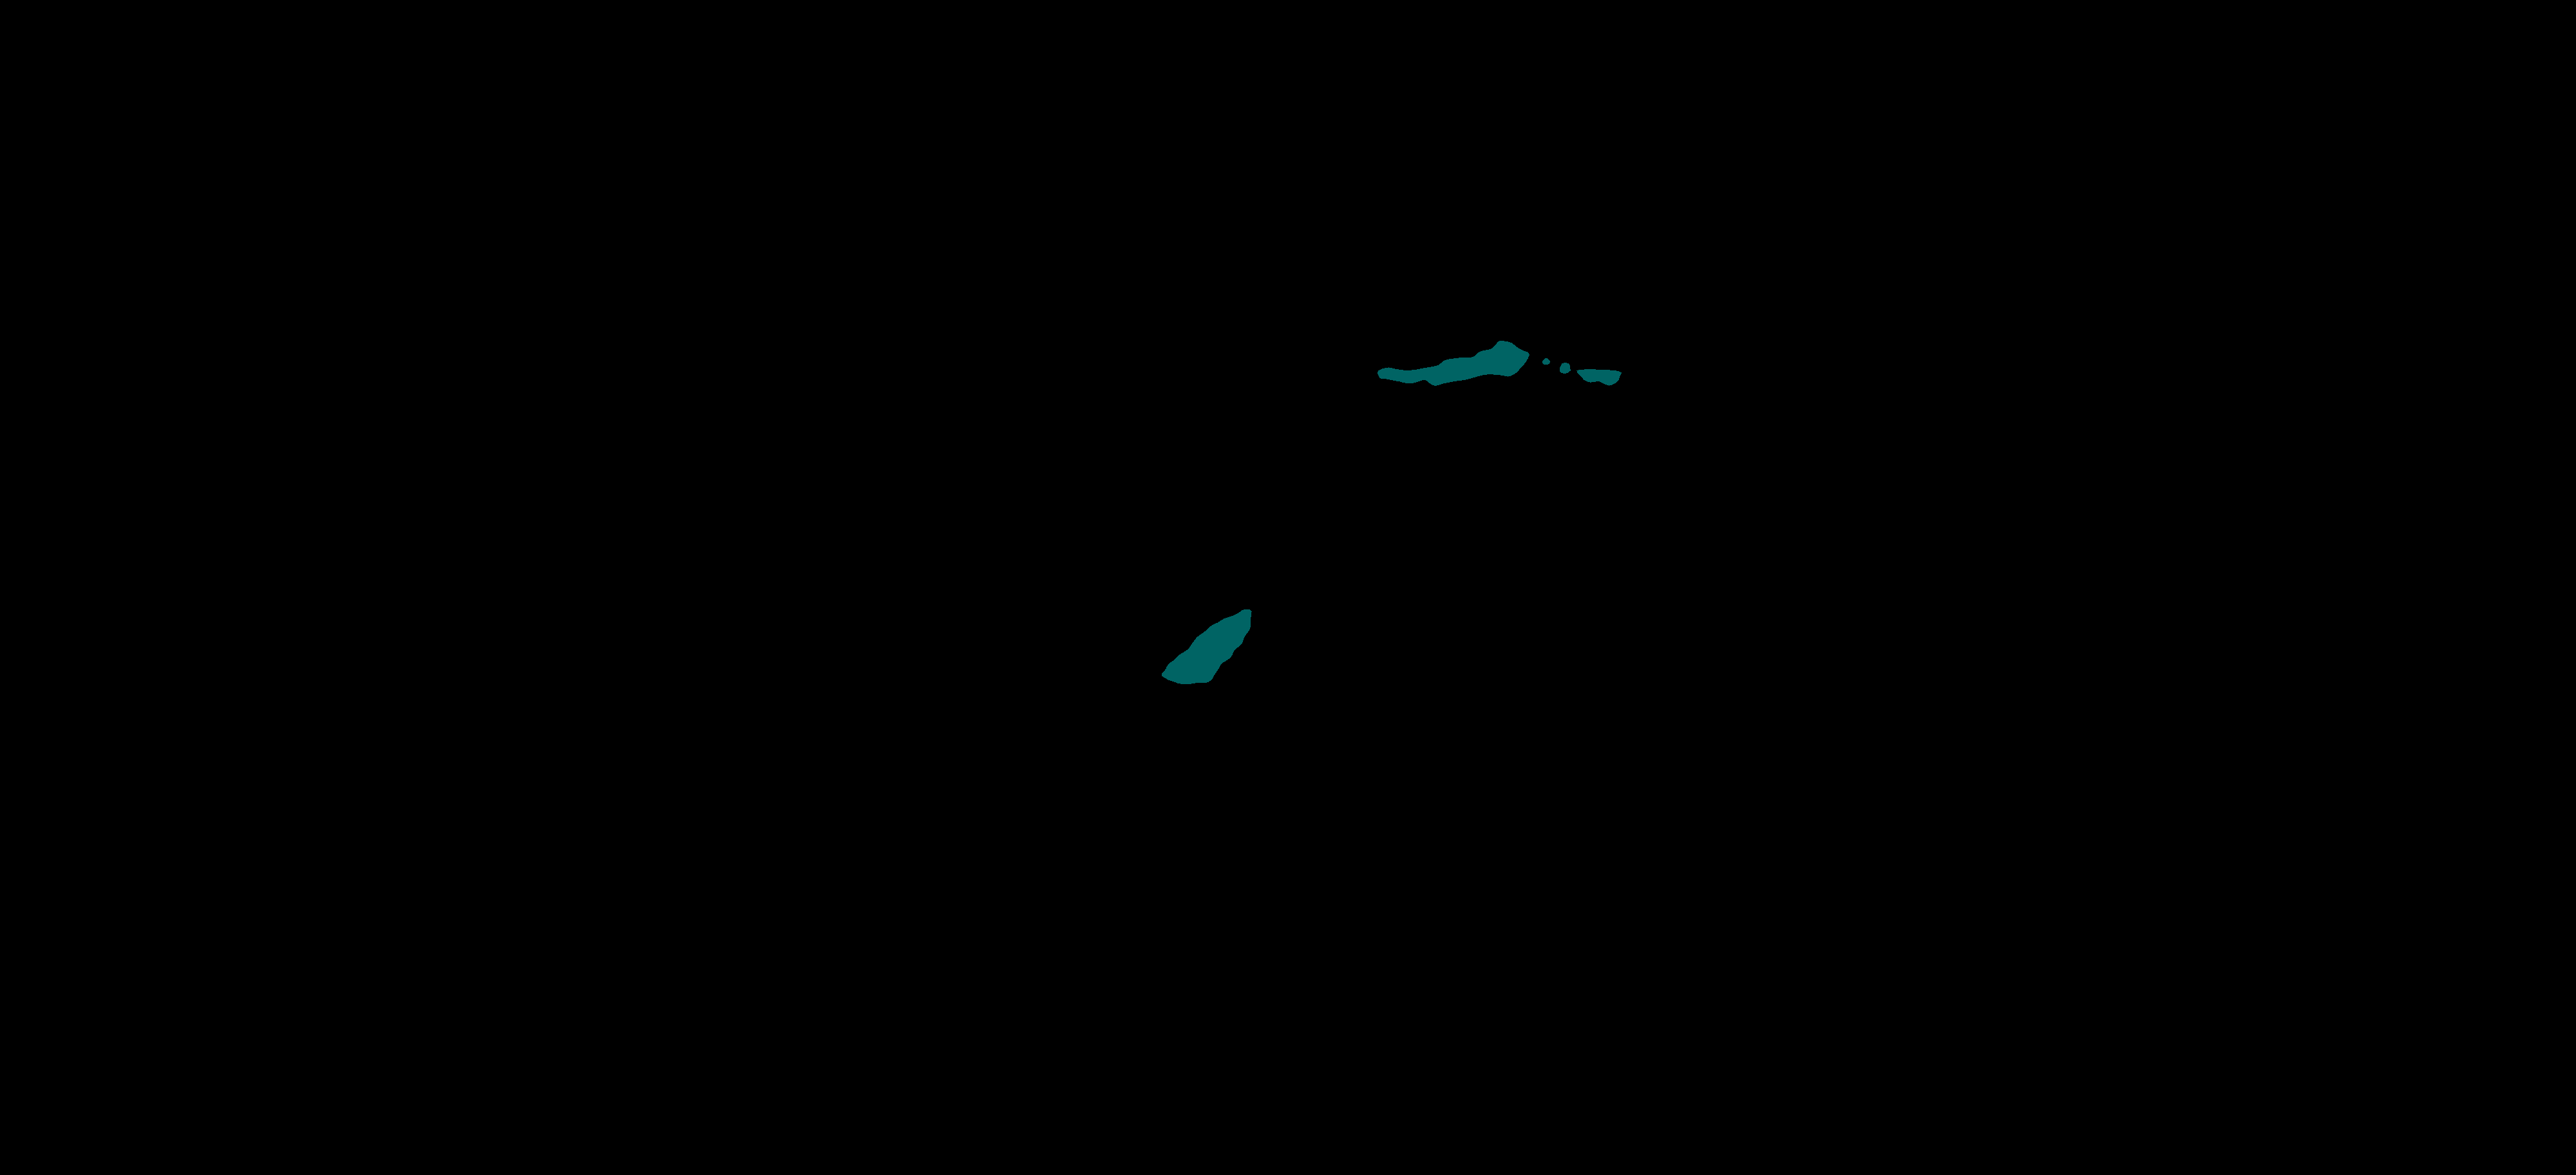

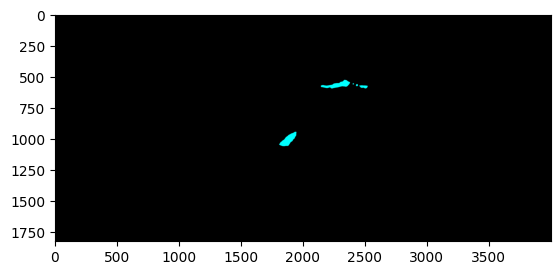

In [354]:
def create_dict(classes):
    result_dict = {}
    for id_ in classes:
        result_dict[id_] = []
    return result_dict


# This works  faster then their method
def create_color_mask(result, pallete): 
    
    print("Creating color mask!")
    start_time_ms = get_current_time_milliseconds()
    mask = convert_tensor_to_array(result)
    binary_mask = mask.squeeze()
    indices_present = set(binary_mask.flatten())
    indices_ = create_dict(indices_present)
    color_mask = np.zeros((binary_mask.shape[0], binary_mask.shape[1], 3))
    
    for i in indices_present: 
        if i != 0:  
            indices_[i].append(np.where(binary_mask==i))
    
    for class_id in indices_present:
        if class_id != 0:
            for h_, w_ in zip(indices_[class_id][0][0], indices_[class_id][0][1]):
                color_mask[h_, w_, 0] = pallete[class_id][0]
                color_mask[h_, w_, 1] = pallete[class_id][1]
                color_mask[h_, w_, 2] = pallete[class_id][2]
            
    
    duration = get_current_time_milliseconds() - start_time_ms
    print("Full duration is: {}".format(duration))
    return color_mask

def visualize_result(img_path, result,  a): 
    
    img = mpimg.imread(img_path)
    color_mask = create_color_mask(result, color_mapping)
    print("Visualizing result")
    plt.figure()
    plt.imshow(img)
    plt.imshow(color_mask, alpha=a)
    
c_mask = create_color_mask(result, color_mapping)

plt.figure()
plt.imshow(c_mask)

c_mask.shape
im = Image.fromarray(np.uint8(c_mask))
display(im)

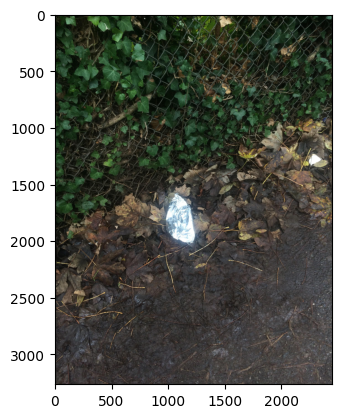

In [327]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

img_pth = test_images[1]
img = mpimg.imread(img_pth)
plt.imshow(img)

def visualize_result(img_path, result,  a): 
    
    img = mpimg.imread(img_path)
    color_mask = create_color_mask(result, color_mapping)
    print("Visualizing result")
    plt.figure()
    plt.imshow(img)
    plt.imshow(color_mask, alpha=a)

In [265]:
for class_ in class_indices: 
    print(class_)

In [192]:
print(color_mapping.keys())

dict_keys([0, 1, 2, 3, 4, 5, 6, 7])


In [213]:

start_time = get_current_time_milliseconds()
print(set((a.flatten())))
duration = get_current_time_milliseconds()  - start_time 
print(duration)

{0, 7}
525


(array([0]),)


In [241]:
print(color_mask)

[[[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 ...

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]

 [[0 0 0]
  [0 0 0]
  [0 0 0]
  ...
  [0 0 0]
  [0 0 0]
  [0 0 0]]]
